# Emotion detection from audio

In [1]:
pip install librosa

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Section 1: Import Libraries
# Importing all the necessary libraries with their purposes
import os  # To handle file operations
import librosa  # For audio processing
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # Enhanced data visualization
from sklearn.model_selection import train_test_split  # For splitting datasets
from sklearn.preprocessing import LabelEncoder  # For encoding labels
from tensorflow.keras.models import Sequential  # To build sequential models
from tensorflow.keras.layers import LSTM, Dense, Dropout  # Model layers
from tensorflow.keras.utils import to_categorical  # For one-hot encoding
import keras_tuner as kt  # For hyperparameter tuning

# Confirming environment setup
print("Libraries imported successfully!")


Libraries imported successfully!


In [3]:
pip install resampy


In [4]:
# Section 2: Define Dataset Path
# Define the path to the dataset folder
DATASET_PATH = r"C:\Users\ASUS\Downloads\Audio_Speech_Actors_01-24"
print(f"Dataset path set to: {DATASET_PATH}")

# Emotion and gender mappings
dict_emotion = {
    '01': 'neutral', '02': 'calm', '03': 'happy', '04': 'sad',
    '05': 'angry', '06': 'fearful', '07': 'disgust', '08': 'surprised'
}
dict_gender = {
    "male": list(range(1, 25, 2)),  # Odd actors are male
    "female": list(range(2, 25, 2))  # Even actors are female
}



Dataset path set to: C:\Users\ASUS\Downloads\Audio_Speech_Actors_01-24


In [5]:
# Display dictionaries
print("Emotion mapping:", dict_emotion)
print("Gender mapping:", dict_gender)



Emotion mapping: {'01': 'neutral', '02': 'calm', '03': 'happy', '04': 'sad', '05': 'angry', '06': 'fearful', '07': 'disgust', '08': 'surprised'}
Gender mapping: {'male': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23], 'female': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]}


In [6]:
# Section 3: Data Cleaning and Exploration
# Feature and label storage
# Storing features separately from labels ensures that the dataset is organized and ready for supervised learning, which relies on clear input-output pairings.
features = []
labels = []

# Function to extract features from audio files
def extract_features(file_path):
    try:
        # Load audio file
        audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast', duration=2.5, sr=22050, offset=0.5)
        # Extract MFCC features
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        return np.mean(mfccs.T, axis=0)  # Compute the mean of MFCCs
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None



In [7]:
# Iterating through the dataset
def process_dataset():
    for actor in os.listdir(DATASET_PATH):
        actor_path = os.path.join(DATASET_PATH, actor)
        if not os.path.isdir(actor_path):
            continue
        for file in os.listdir(actor_path):
            if file.endswith(".wav"):
                file_path = os.path.join(actor_path, file)
                feature = extract_features(file_path)
                if feature is not None:
                    features.append(feature)
                    emotion_label = file[6:8]  # Extract emotion code
                    labels.append(emotion_label)  # Append emotion label
    print("Feature extraction completed!")

process_dataset()

# Converting features to a numpy array
X = np.array(features)
labels = np.array(labels)



Feature extraction completed!


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA


In [9]:
# Data exploration


In [10]:
# Number of samples and features
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features per sample: {X.shape[1]}")

# Label encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)
dict_emotion = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))



Number of samples: 1440
Number of features per sample: 40


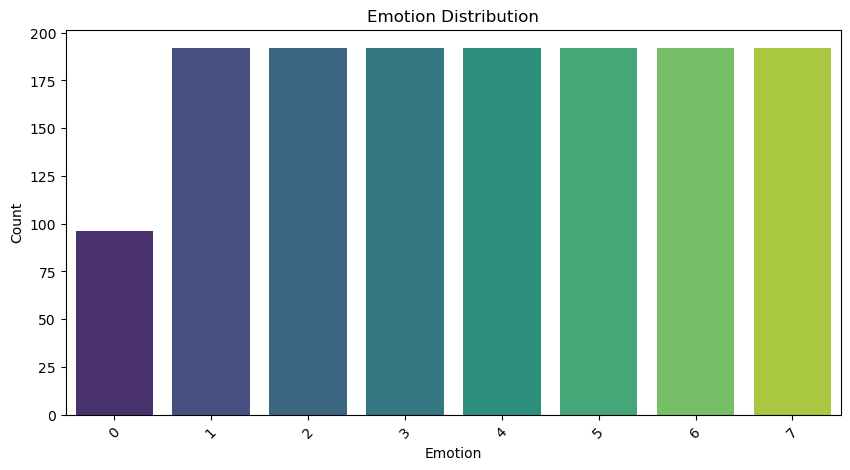

In [50]:
# Distribution of emotions
emotion_counts = pd.Series(labels).map(dict_emotion).value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette="viridis")
plt.title("Emotion Distribution")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Automatically rotate x-axis labels for better readability
plt.show()


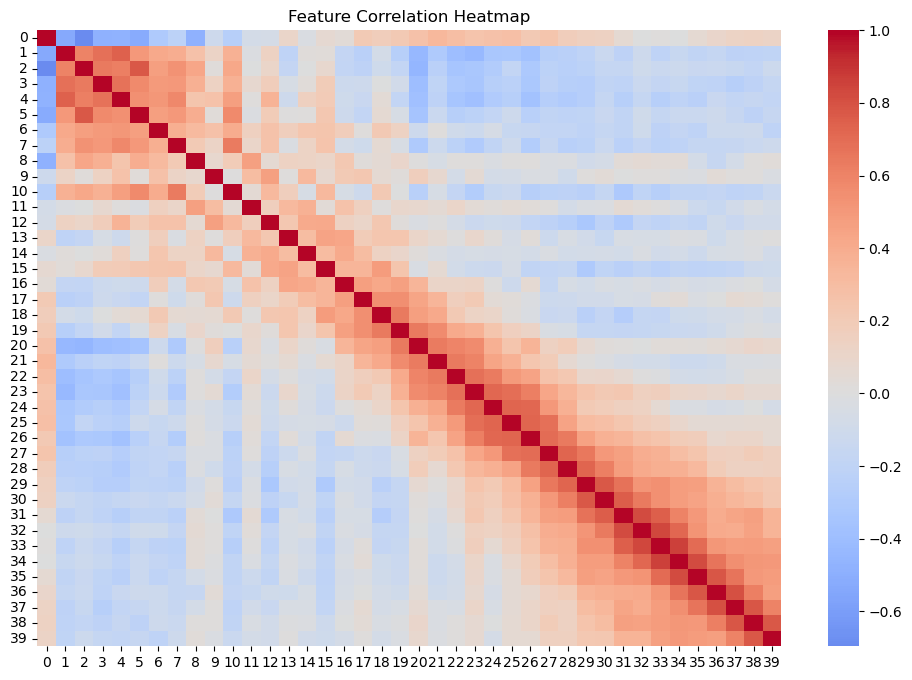

In [13]:
# Correlation Heatmap of Features
correlation_matrix = np.corrcoef(X, rowvar=False)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()



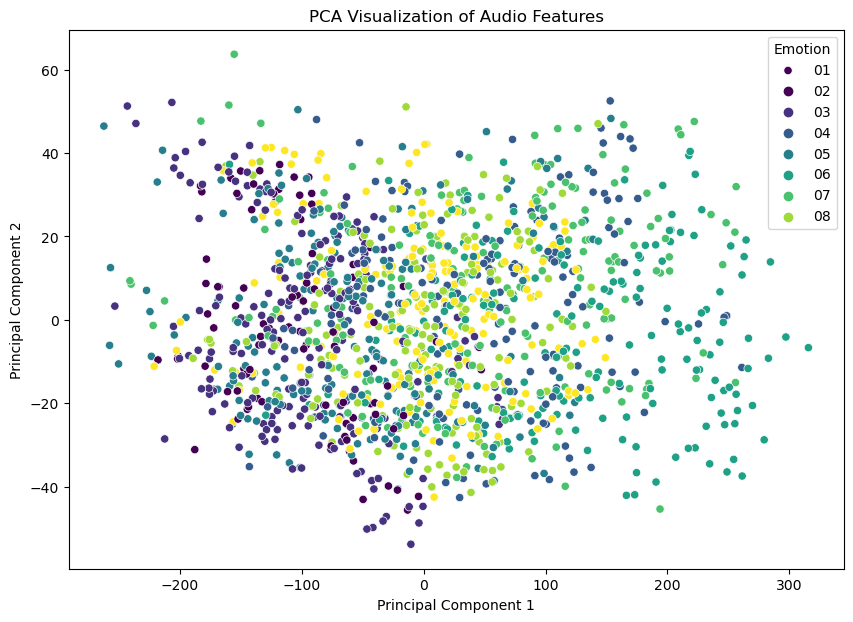

In [14]:
# PCA for dimensionality reduction and visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=[dict_emotion[l] for l in labels], palette="viridis", legend="full")
plt.title("PCA Visualization of Audio Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Emotion", labels=dict_emotion.keys())
plt.show()



Features vs. Emotions:
Features:

These are numerical values extracted from audio signals, such as:
Mel-frequency cepstral coefficients (MFCCs).
Chroma features.
Spectral contrast.
Zero-crossing rate, etc.
Each row in X corresponds to a single audio sample, and each column corresponds to a specific feature.
Emotions:

These are the labels or categories (e.g., "happy," "sad," "angry") associated with each audio file.
In your dataset, the labels array contains these emotion identifiers.
Why Boxplot of Features?
The boxplot shows the distribution of feature values across all audio samples. It helps to:

Identify the range of values for each feature.
Detect outliers or anomalies in feature data.
Ensure features are well-behaved (e.g., not skewed or having extreme values) before training the model.

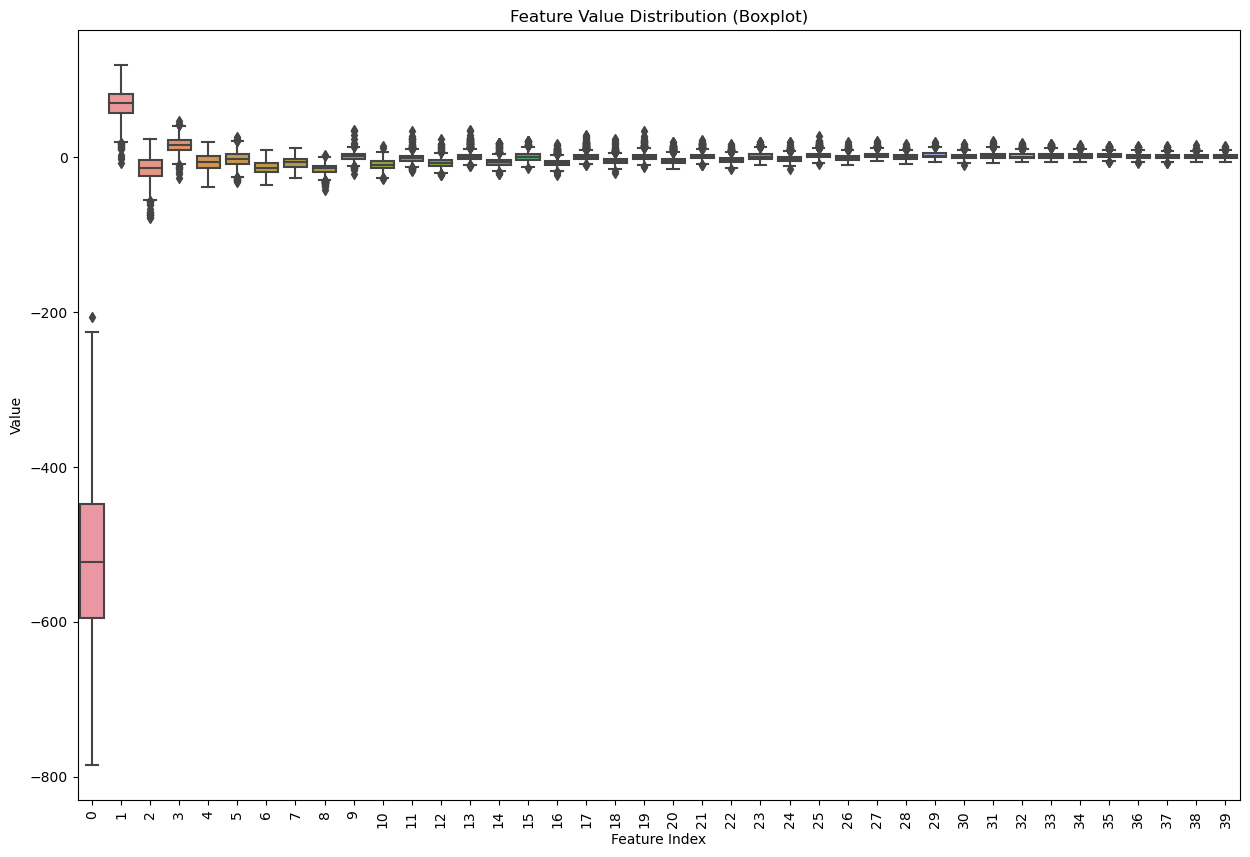

In [16]:
# Distribution of Features (Boxplot)
plt.figure(figsize=(15, 10))
sns.boxplot(data=pd.DataFrame(X))
plt.title("Feature Value Distribution (Boxplot)")
plt.xlabel("Feature Index")
plt.ylabel("Value")
plt.xticks(rotation=90)
plt.show()



To analyze how specific features vary by emotion, we can group the features by emotion labels and create boxplots for each feature, separated by emotion categories.

In [ ]:
Explanation:
features_df Creation:

Combines features and emotion labels into a single DataFrame for easy visualization.
Mapping Emotion Labels:

Converts numeric emotion labels into their human-readable names using dict_emotion.
Boxplot for Selected Features:

Creates boxplots for selected feature indices ([0, 1, 2, 3, 4]) to show how these features vary across different emotions.
Visualization Layout:

Arranges the boxplots in a grid for better readability.

In [ ]:
# Convert features and labels into a DataFrame for easier analysis
features_df = pd.DataFrame(X)
features_df['Emotion'] = labels

# Map emotion labels to their corresponding names for better readability
features_df['Emotion'] = features_df['Emotion'].map(dict_emotion)

# Display boxplots of a few selected features grouped by emotion
selected_features = [0, 1, 2, 3, 4]  # Choose a few feature indices to analyze
plt.figure(figsize=(20, 10))

for i, feature_index in enumerate(selected_features, 1):
    plt.subplot(2, len(selected_features)//2 + len(selected_features)%2, i)
    sns.boxplot(x='Emotion', y=feature_index, data=features_df)
    plt.title(f"Feature {feature_index} by Emotion")
    plt.xlabel("Emotion")
    plt.ylabel(f"Feature {feature_index} Value")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


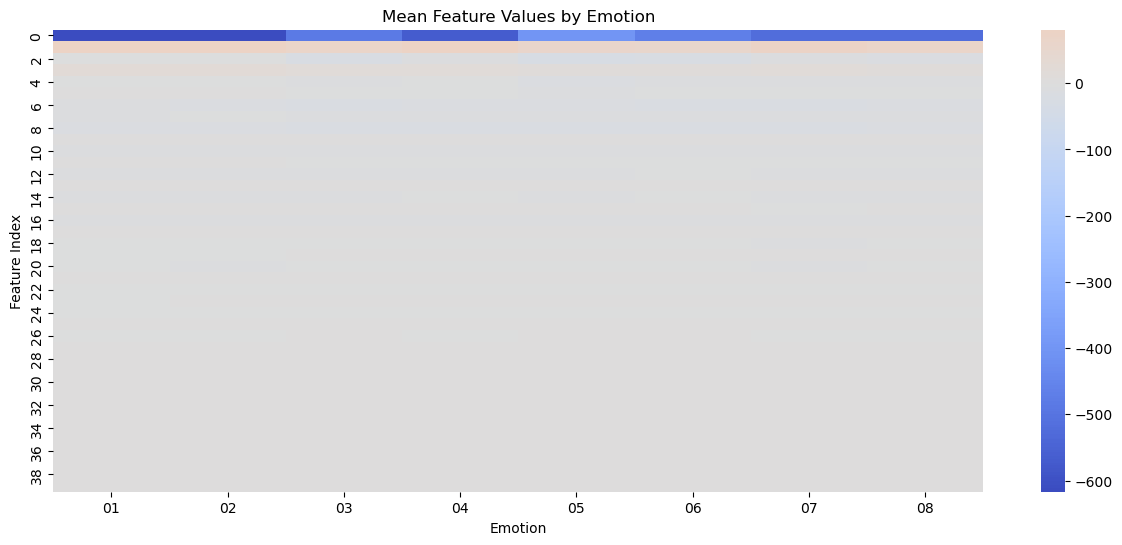

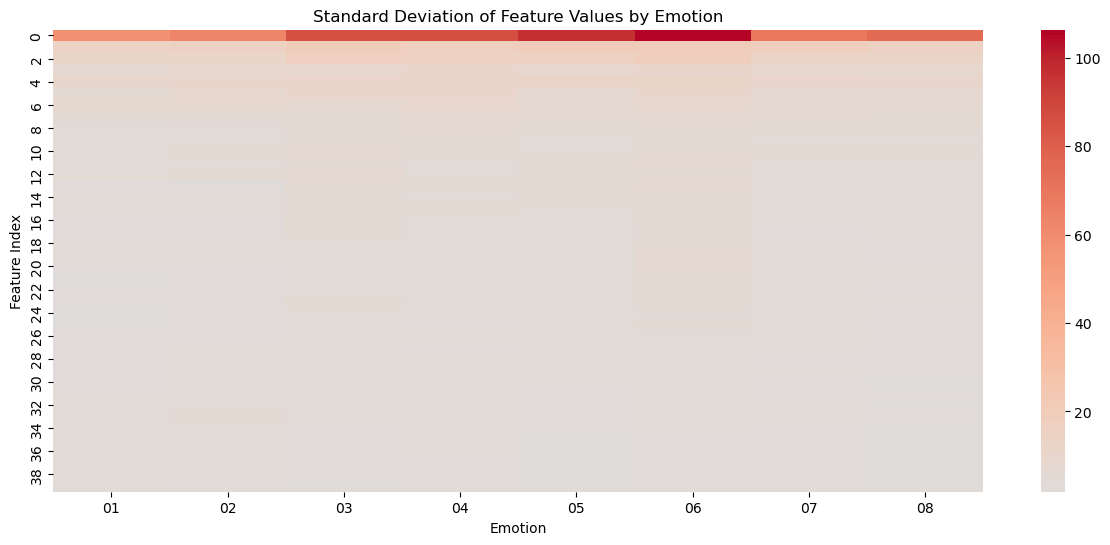

In [17]:
# Mean and Standard Deviation of Features Across Emotions
feature_stats = pd.DataFrame(X)
feature_stats["Emotion"] = labels
mean_features = feature_stats.groupby("Emotion").mean()
std_features = feature_stats.groupby("Emotion").std()

plt.figure(figsize=(15, 6))
sns.heatmap(mean_features.T, cmap="coolwarm", center=0)
plt.title("Mean Feature Values by Emotion")
plt.xlabel("Emotion")
plt.ylabel("Feature Index")
plt.show()

plt.figure(figsize=(15, 6))
sns.heatmap(std_features.T, cmap="coolwarm", center=0)
plt.title("Standard Deviation of Feature Values by Emotion")
plt.xlabel("Emotion")
plt.ylabel("Feature Index")
plt.show()



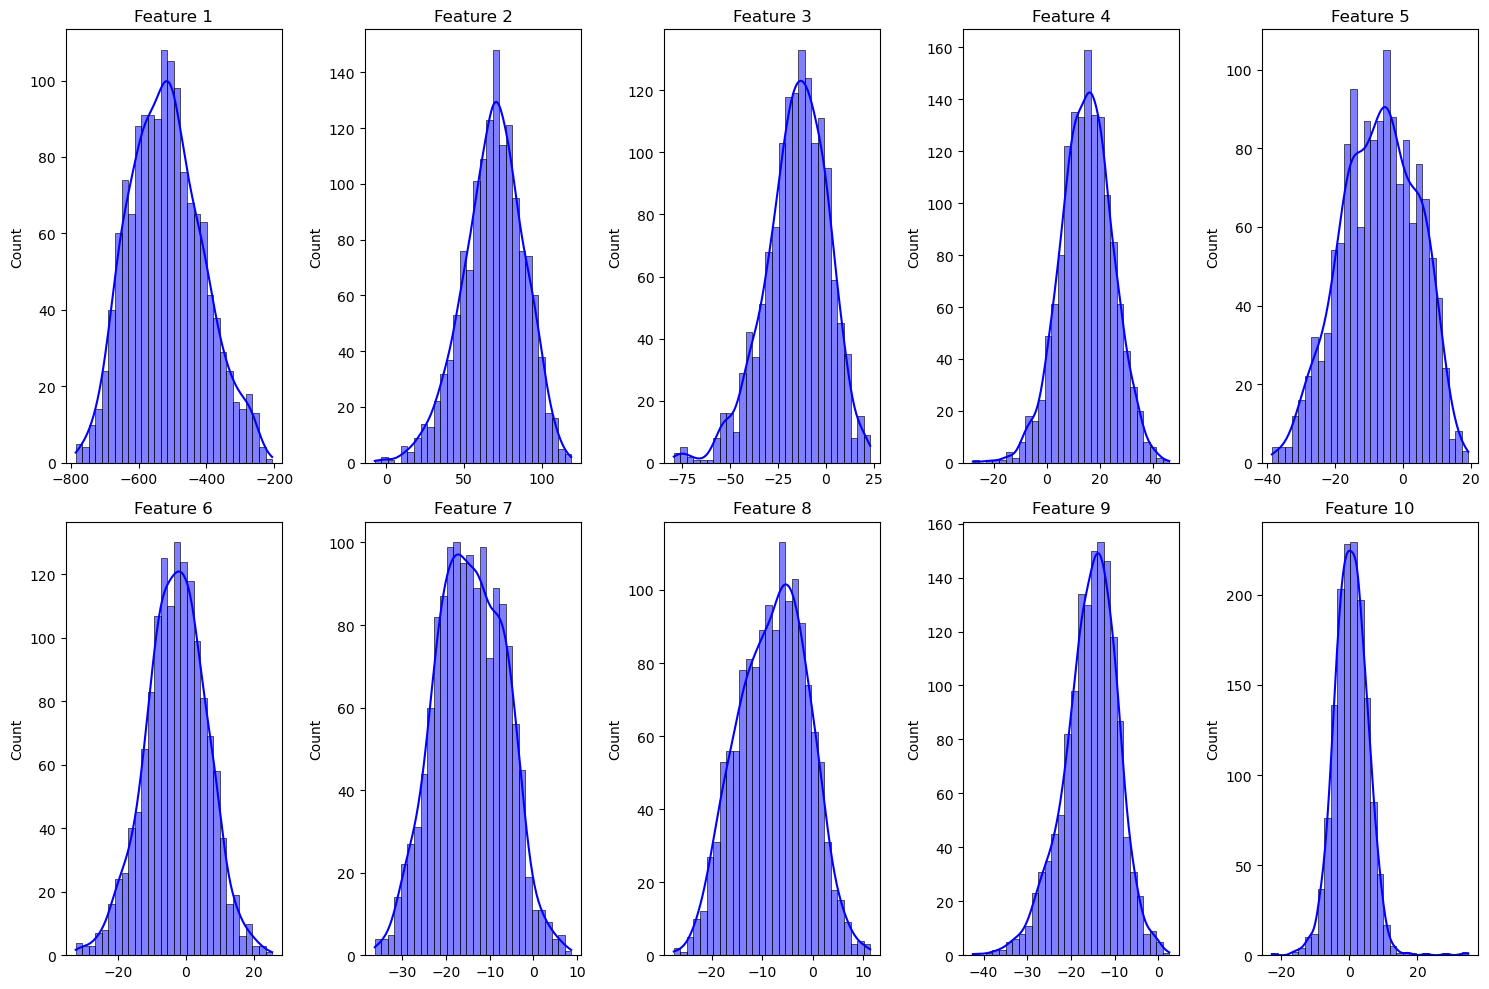

In [18]:
# Feature Histogram
num_features_to_plot = min(10, X.shape[1])  # Limit to first 10 features for clarity
plt.figure(figsize=(15, 10))
for i in range(num_features_to_plot):
    plt.subplot(2, 5, i + 1)
    sns.histplot(X[:, i], kde=True, bins=30, color='blue')
    plt.title(f"Feature {i+1}")
plt.tight_layout()
plt.show()



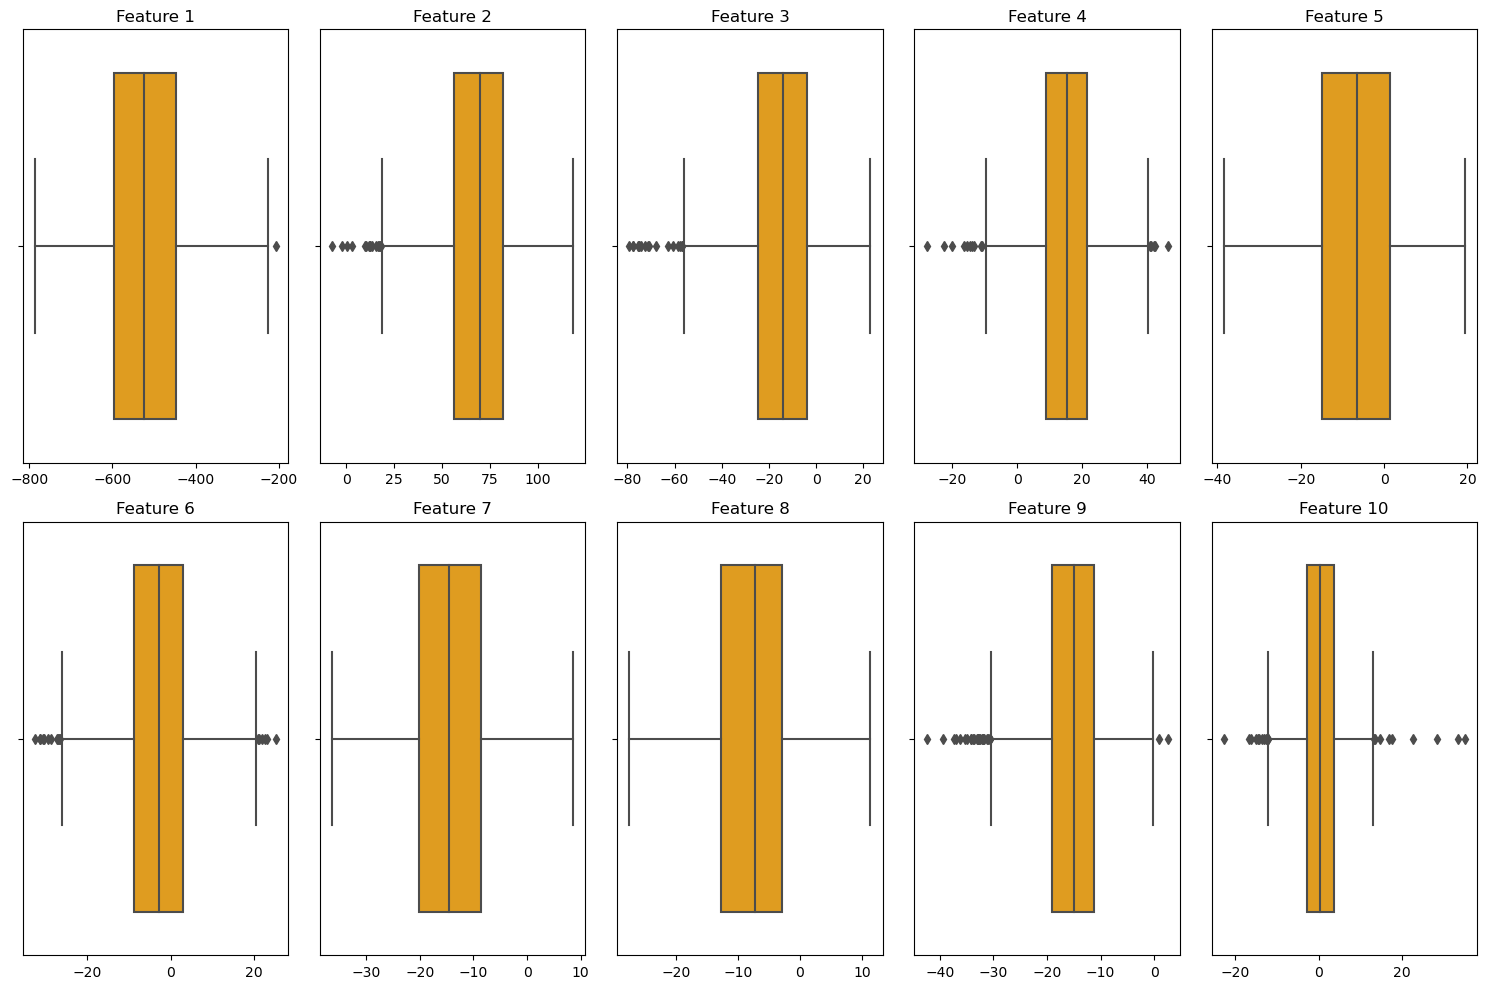

In [19]:
# Outlier Detection (Boxplot for each feature)
plt.figure(figsize=(15, 10))
for i in range(num_features_to_plot):
    plt.subplot(2, 5, i + 1)
    sns.boxplot(x=X[:, i], color="orange")
    plt.title(f"Feature {i+1}")
plt.tight_layout()
plt.show()


In [20]:
# Section 4: Feature Engineering and Label Encoding
# Reshaping X for LSTM
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Encoding emotion labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)
y = to_categorical(y)  # One-hot encoding

# Display encoded labels
print("Emotion labels encoded successfully!")
print(f"Classes: {label_encoder.classes_}")



Emotion labels encoded successfully!
Classes: ['01' '02' '03' '04' '05' '06' '07' '08']


In [24]:
# Section 5: Split Data into Training, Validation, and Test Sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=82)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=82)

# Display shapes
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Validation set shape: {X_val.shape}, {y_val.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

# Section 6: Define and Train LSTM Model
# Function to build LSTM model
def build_lstm_model():
    model = Sequential([
        LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
        Dropout(0.3),
        LSTM(64),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dense(y_train.shape[1], activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Initialize model
model = build_lstm_model()
model.summary()



Training set shape: (1008, 1, 40), (1008, 8)
Validation set shape: (216, 1, 40), (216, 8)
Test set shape: (216, 1, 40), (216, 8)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                 │ (None, 1, 128)        │       86,528 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_4 (Dropout)           │ (None, 1, 128)        │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ lstm_5 (LSTM)                 │ (None, 64)            │       49,408 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_5 (Dropout)           │ (None, 64)            │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_4 (Dense)               │ (None, 64)            │        4,160 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_5 (Dense)               │ (None, 8)             │          520 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 140,616 (549.28 KB)

 Trainable params: 140,616 (549.28 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Train model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, verbose=1)



Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5838 - loss: 1.1195 - val_accuracy: 0.4815 - val_loss: 1.3736
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6094 - loss: 1.1060 - val_accuracy: 0.4722 - val_loss: 1.4137
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5954 - loss: 1.0476 - val_accuracy: 0.4444 - val_loss: 1.3981
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5945 - loss: 1.0716 - val_accuracy: 0.4815 - val_loss: 1.3916
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5808 - loss: 1.0648 - val_accuracy: 0.4861 - val_loss: 1.3898
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5908 - loss: 1.0801 - val_accuracy: 0.4537 - val_loss: 1.3952
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6411 - loss: 1.0073 - val_accuracy: 0.4676 - val_loss: 1.3648
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5964 - loss: 1.0792 - val_accuracy: 0.

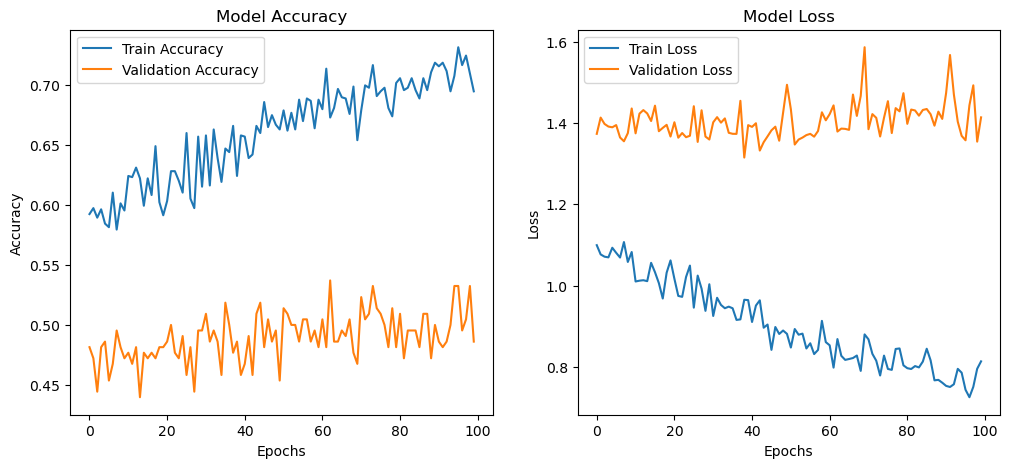

In [28]:
# Section 7: Evaluate Model Performance
# Plot accuracy and loss
def plot_metrics(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_metrics(history)



In [29]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")



Test Accuracy: 0.54


In [30]:
# Section 8: Hyperparameter Tuning
# Define the hypermodel for KerasTuner
def build_hypermodel(hp):
    model = Sequential([
        LSTM(hp.Int('units', min_value=64, max_value=256, step=32), return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
        Dropout(hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)),
        LSTM(hp.Int('units_2', min_value=32, max_value=128, step=32)),
        Dropout(hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)),
        Dense(hp.Int('dense_units', min_value=32, max_value=128, step=32), activation='relu'),
        Dense(y_train.shape[1], activation='softmax')
    ])
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model



In [37]:
# Initialize Keras Tuner
tuner = kt.Hyperband(
    build_hypermodel,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='tuning_logs',
    project_name='emotion_recognition',
    overwrite=True
)



In [38]:
# Perform hyperparameter tuning
print("Starting hyperparameter tuning...")
tuner.search(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, verbose=1)



Trial 30 Complete [00h 00m 14s]
val_accuracy: 0.32870370149612427

Best val_accuracy So Far: 0.42129629850387573
Total elapsed time: 00h 11m 53s


In [40]:
# Step 1: Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)
if len(best_hps) == 0:
    print("No successful trials were completed during hyperparameter tuning.")
else:
    best_hps = best_hps[0]
    print(f"Best Hyperparameters:\n"
          f"LSTM Units (Layer 1): {best_hps.get('units')}\n"
          f"LSTM Units (Layer 2): {best_hps.get('units_2')}\n"
          f"Dense Layer Units: {best_hps.get('dense_units')}\n"
          f"Dropout Rate (Layer 1): {best_hps.get('dropout')}\n"
          f"Dropout Rate (Layer 2): {best_hps.get('dropout_2')}\n"
          f"Optimizer: {best_hps.get('optimizer')}")



Best Hyperparameters:
LSTM Units (Layer 1): 224
LSTM Units (Layer 2): 128
Dense Layer Units: 96
Dropout Rate (Layer 1): 0.2
Dropout Rate (Layer 2): 0.2
Optimizer: adam


In [46]:
# Step 2: Build and Train the Optimized Model
print("Training the best model with the optimal hyperparameters...")
best_model = tuner.hypermodel.build(best_hps)

# Training the model
history_best = best_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=200,  # Training the model for a longer period with the best hyperparameters
    batch_size=32,
    verbose=1
)



Training the best model with the optimal hyperparameters...
Epoch 1/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.1475 - loss: 2.0615 - val_accuracy: 0.2269 - val_loss: 1.9835
Epoch 2/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2350 - loss: 1.9430 - val_accuracy: 0.2870 - val_loss: 1.8553
Epoch 3/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2818 - loss: 1.8402 - val_accuracy: 0.3148 - val_loss: 1.7989
Epoch 4/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3068 - loss: 1.7854 - val_accuracy: 0.3657 - val_loss: 1.7328
Epoch 5/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2921 - loss: 1.7562 - val_accuracy: 0.3981 - val_loss: 1.6780
Epoch 6/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3534 - loss: 1.7101 - val_accuracy: 0.3889 - val_loss: 1.6692
Epoch 7/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3714 - loss: 1.6342 - val_accuracy: 0.3843 - val_loss: 1.6301
Epoch 8/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/s

In [47]:
# Step 3: Evaluate the Best Model
print("Evaluating the best model on the test set...")
test_loss, test_accuracy = best_model.evaluate(X_test, y_test, verbose=0)
print(f"Optimized Test Loss: {test_loss:.4f}")
print(f"Optimized Test Accuracy: {test_accuracy:.4f}")



Evaluating the best model on the test set...
Optimized Test Loss: 1.4157
Optimized Test Accuracy: 0.6296


Visualizing the training process of the optimized model...


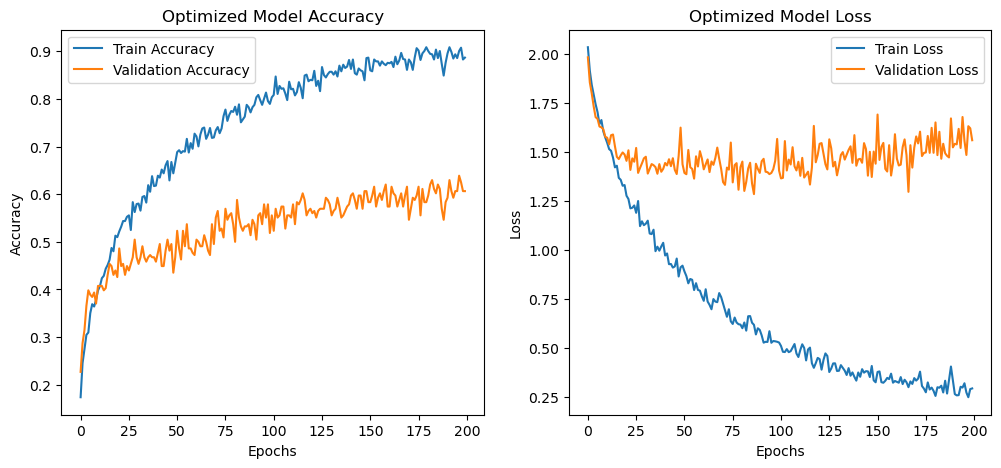

In [48]:
# Step 4: Visualize Training and Validation Metrics
print("Visualizing the training process of the optimized model...")

def plot_best_model_metrics(history):
    plt.figure(figsize=(12, 5))
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Optimized Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Optimized Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_best_model_metrics(history_best)



In [53]:
# Save the best model
print("Saving the best model for future use...")
model_save_path = "C:\sound_emotion_detection\model_lstm.h5"
best_model.save(model_save_path)
print(f"Optimized model saved at: {model_save_path}")

# Final Note
print("Hyperparameter tuning and model optimization completed successfully!")


Saving the best model for future use...
Optimized model saved at: C:\sound_emotion_detection\model_lstm.h5
Hyperparameter tuning and model optimization completed successfully!


In [ ]:
running locally on git hub app

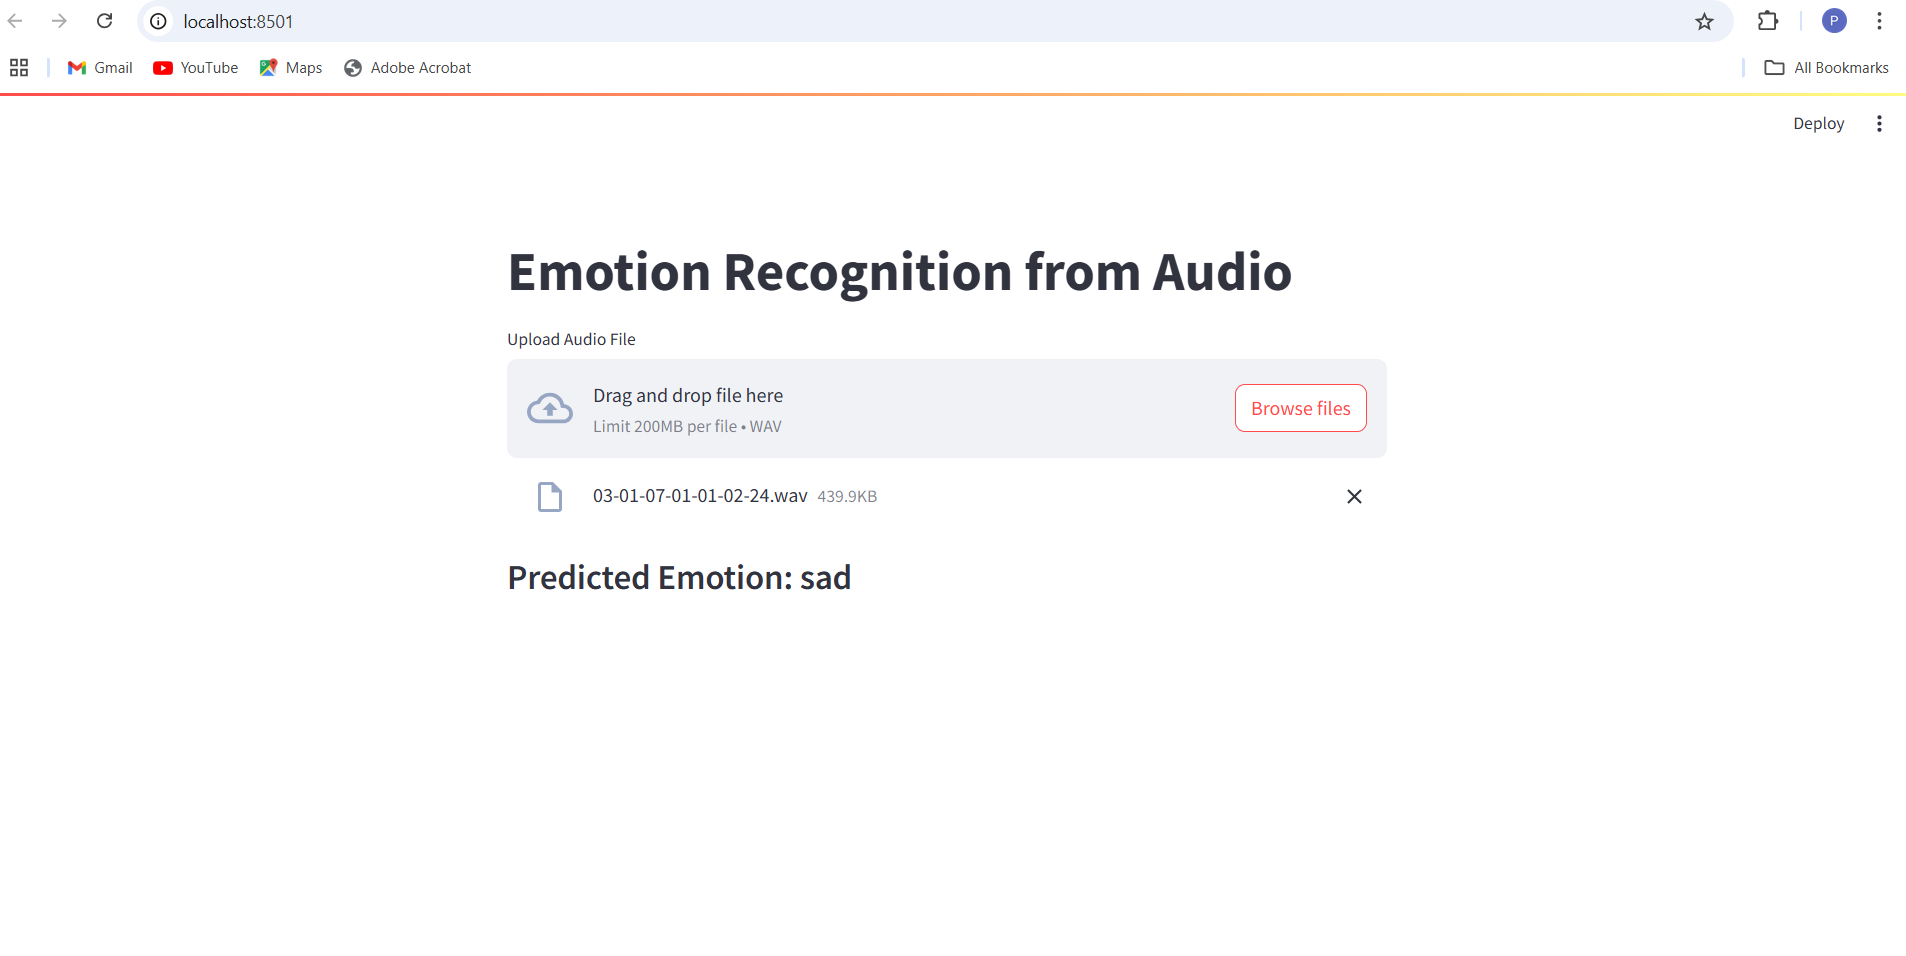

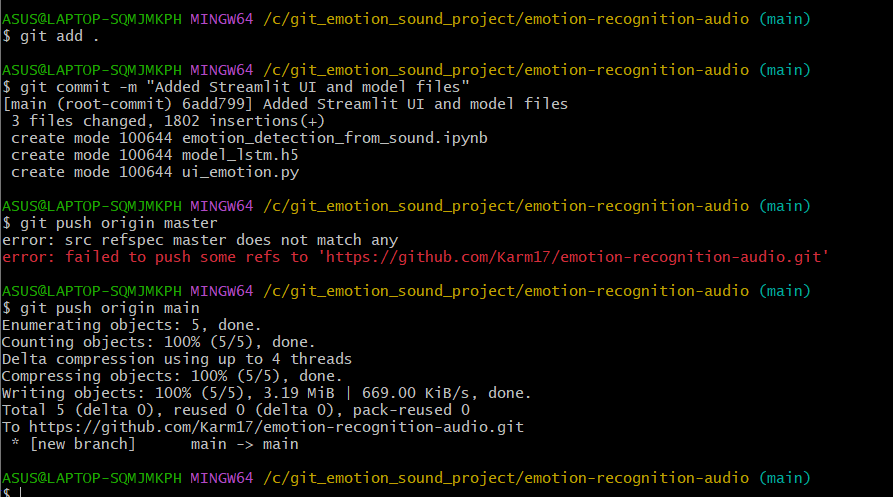


In [ ]:
ui deployed on treamlit sharing using github repositery


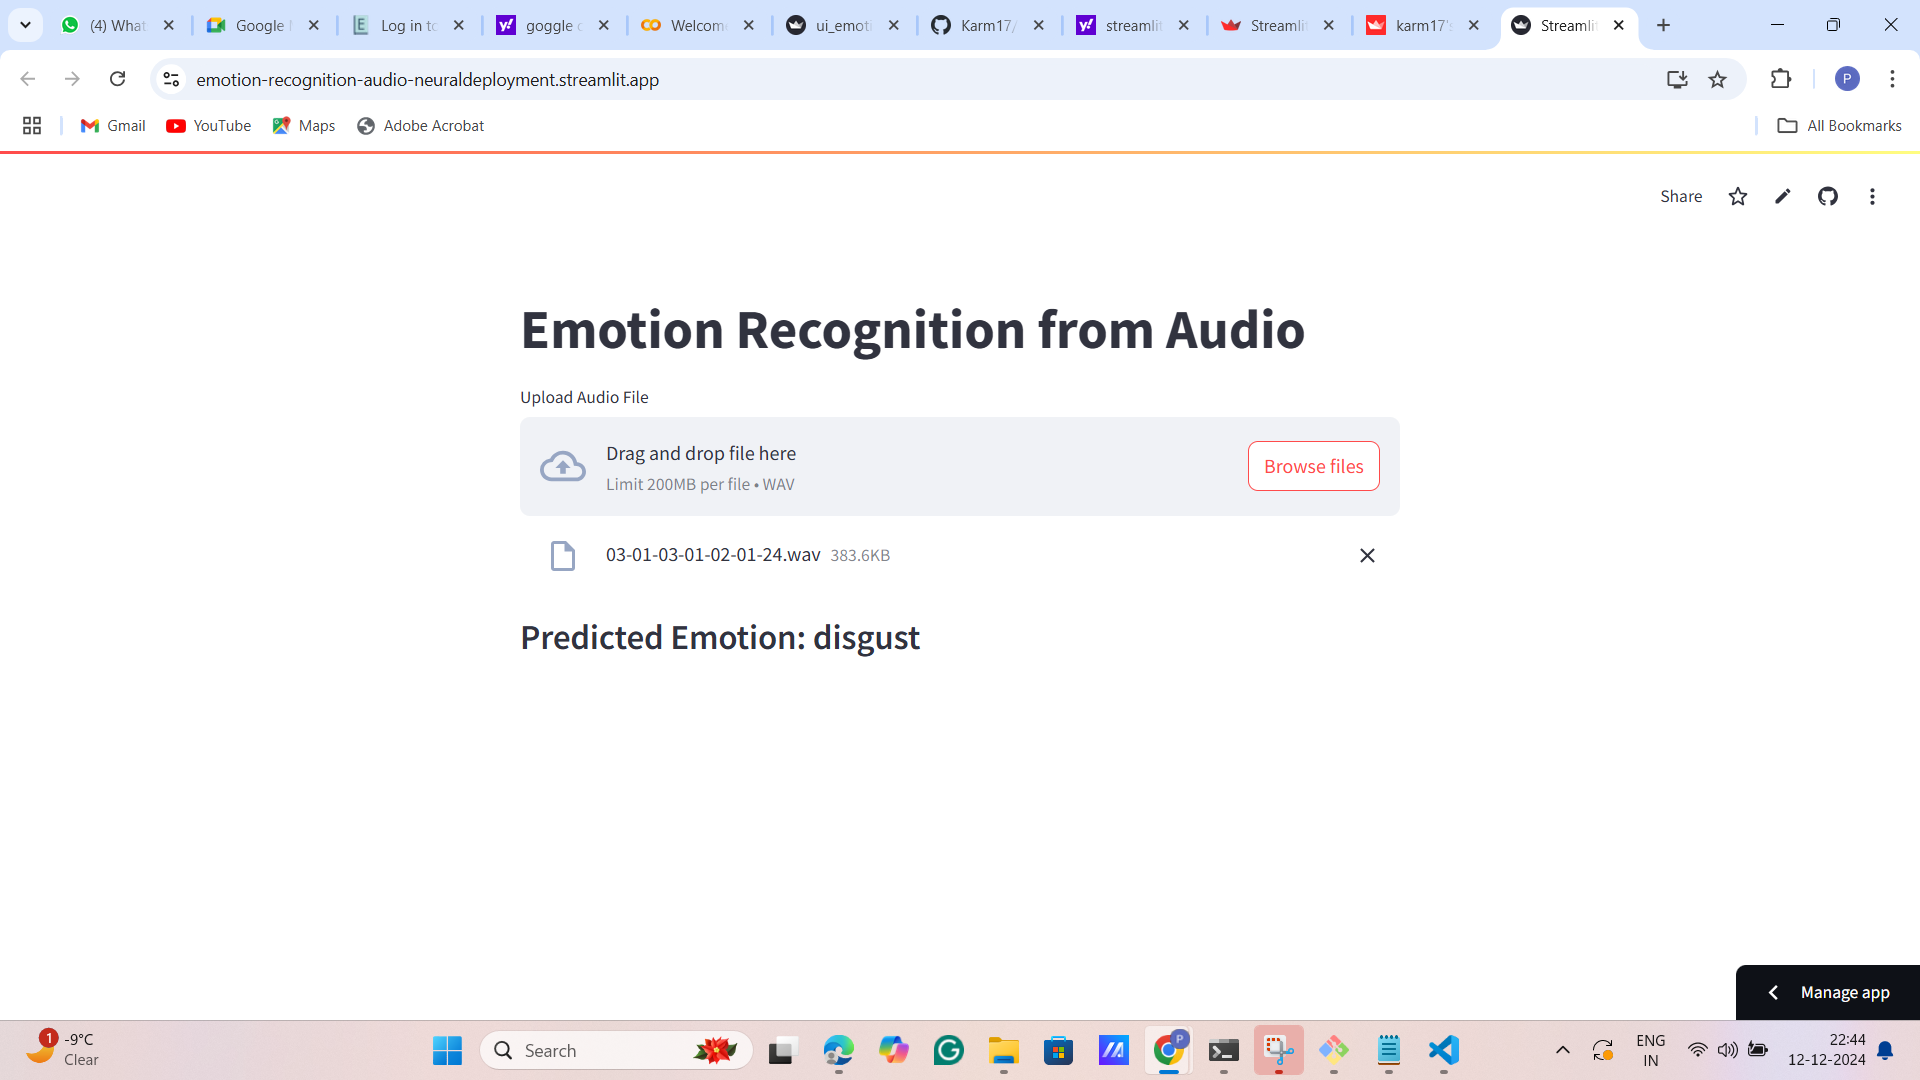

# Architecture with GRU layers.

In [56]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense

# Define GRU Model
def build_gru_model():
    model = Sequential([
        GRU(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
        Dropout(0.3),
        GRU(64),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dense(y_train.shape[1], activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Initialize GRU model
gru_model = build_gru_model()
gru_model.summary()


C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ gru (GRU)                     │ (None, 1, 128)        │       65,280 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_8 (Dropout)           │ (None, 1, 128)        │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ gru_1 (GRU)                   │ (None, 64)            │       37,248 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_9 (Dropout)           │ (None, 64)            │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_8 (Dense)               │ (None, 64)            │        4,160 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_9 (Dense)               │ (None, 8)             │          520 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 107,208 (418.78 KB)

 Trainable params: 107,208 (418.78 KB)

 Non-trainable params: 0 (0.00 B)

 Train the GRU Model

In [58]:
# Train GRU model
gru_history = gru_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    verbose=1
)


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6075 - loss: 1.0386 - val_accuracy: 0.4583 - val_loss: 1.3768
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6243 - loss: 0.9746 - val_accuracy: 0.4954 - val_loss: 1.3335
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6340 - loss: 0.9911 - val_accuracy: 0.4815 - val_loss: 1.3989
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6679 - loss: 0.9520 - val_accuracy: 0.4861 - val_loss: 1.4129
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6414 - loss: 0.9947 - val_accuracy: 0.4769 - val_loss: 1.3813
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6353 - loss: 0.9764 - val_accuracy: 0.4769 - val_loss: 1.4436
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6172 - loss: 0.9738 - val_accuracy: 0.4861 - val_loss: 1.3329
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6255 - loss: 0.9443 - val_accuracy: 0.5231 

# Evaluate GRU Model Performance
Evaluate the GRU model on the test set and visualize the training metrics.

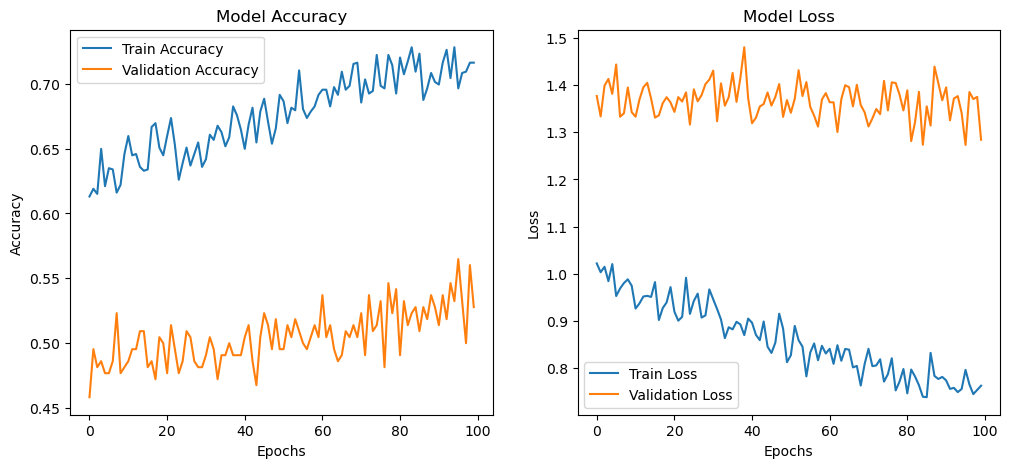

GRU Test Loss: 1.3229
GRU Test Accuracy: 0.5648


In [60]:
# Plot training metrics for GRU
plot_metrics(gru_history)

# Evaluate on test set
gru_test_loss, gru_test_accuracy = gru_model.evaluate(X_test, y_test, verbose=0)
print(f"GRU Test Loss: {gru_test_loss:.4f}")
print(f"GRU Test Accuracy: {gru_test_accuracy:.4f}")


Hyperparameter Tuning for GRU
Use Keras Tuner to find the optimal hyperparameters for the GRU model.

In [61]:
# Define hypermodel for GRU
def build_gru_hypermodel(hp):
    model = Sequential([
        GRU(hp.Int('units', min_value=64, max_value=256, step=32), return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
        Dropout(hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)),
        GRU(hp.Int('units_2', min_value=32, max_value=128, step=32)),
        Dropout(hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)),
        Dense(hp.Int('dense_units', min_value=32, max_value=128, step=32), activation='relu'),
        Dense(y_train.shape[1], activation='softmax')
    ])
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model



In [62]:
# Initialize Keras Tuner for GRU
gru_tuner = kt.Hyperband(
    build_gru_hypermodel,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='gru_tuning_logs',
    project_name='gru_emotion_recognition',
    overwrite=True
)

# Perform hyperparameter tuning
print("Starting GRU hyperparameter tuning...")
gru_tuner.search(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, verbose=1)



Trial 30 Complete [00h 00m 23s]
val_accuracy: 0.3611111044883728

Best val_accuracy So Far: 0.42592594027519226
Total elapsed time: 00h 10m 12s


In [63]:
# Retrieve the best hyperparameters
best_gru_hps = gru_tuner.get_best_hyperparameters(num_trials=1)
if len(best_gru_hps) == 0:
    print("No successful trials were completed during GRU hyperparameter tuning.")
else:
    best_gru_hps = best_gru_hps[0]
    print(f"Best Hyperparameters for GRU:\n"
          f"GRU Units (Layer 1): {best_gru_hps.get('units')}\n"
          f"GRU Units (Layer 2): {best_gru_hps.get('units_2')}\n"
          f"Dense Layer Units: {best_gru_hps.get('dense_units')}\n"
          f"Dropout Rate (Layer 1): {best_gru_hps.get('dropout')}\n"
          f"Dropout Rate (Layer 2): {best_gru_hps.get('dropout_2')}\n"
          f"Optimizer: {best_gru_hps.get('optimizer')}")



Best Hyperparameters for GRU:
GRU Units (Layer 1): 128
GRU Units (Layer 2): 96
Dense Layer Units: 128
Dropout Rate (Layer 1): 0.2
Dropout Rate (Layer 2): 0.2
Optimizer: adam


In [64]:
# Build and train the best GRU model
print("Training the best GRU model with the optimal hyperparameters...")
best_gru_model = gru_tuner.hypermodel.build(best_gru_hps)
gru_history_best = best_gru_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=200,  # Train for a longer period with the best hyperparameters
    batch_size=32,
    verbose=1
)



Training the best GRU model with the optimal hyperparameters...
Epoch 1/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.1397 - loss: 2.0734 - val_accuracy: 0.1898 - val_loss: 1.9868
Epoch 2/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2116 - loss: 1.9705 - val_accuracy: 0.2222 - val_loss: 1.9207
Epoch 3/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2268 - loss: 1.9035 - val_accuracy: 0.2685 - val_loss: 1.8556
Epoch 4/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2781 - loss: 1.8490 - val_accuracy: 0.3056 - val_loss: 1.8153
Epoch 5/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3136 - loss: 1.8009 - val_accuracy: 0.2917 - val_loss: 1.7954
Epoch 6/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3150 - loss: 1.7771 - val_accuracy: 0.3056 - val_loss: 1.7970
Epoch 7/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3057 - loss: 1.7763 - val_accuracy: 0.3148 - val_loss: 1.7372
Epoch 8/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10m

In [65]:
# Evaluate the best GRU model
gru_test_loss_best, gru_test_accuracy_best = best_gru_model.evaluate(X_test, y_test, verbose=0)
print(f"Optimized GRU Test Loss: {gru_test_loss_best:.4f}")
print(f"Optimized GRU Test Accuracy: {gru_test_accuracy_best:.4f}")



Optimized GRU Test Loss: 1.4674
Optimized GRU Test Accuracy: 0.6019


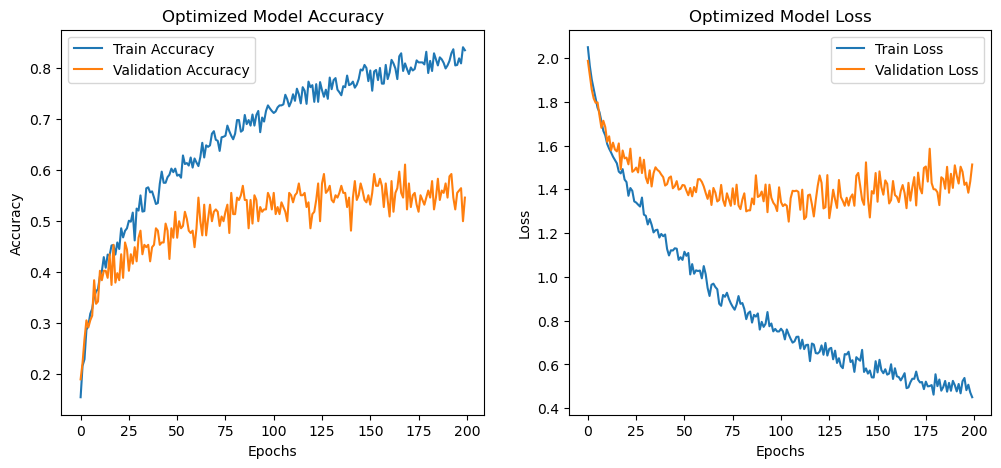

In [66]:
# Visualize metrics for the best GRU model
plot_best_model_metrics(gru_history_best)


Save the GRU Model
Save the optimized GRU model for future use.

In [67]:
# Save the best GRU model
gru_model_save_path = "C:\sound_emotion_detection\model_gru.h5"
best_gru_model.save(gru_model_save_path)
print(f"Optimized GRU model saved at: {gru_model_save_path}")


Optimized GRU model saved at: C:\sound_emotion_detection\model_gru.h5


In [69]:
print(f"LSTM Test Accuracy: {test_accuracy:.4f}")
print(f"GRU Test Accuracy: {gru_test_accuracy_best:.4f}")


LSTM Test Accuracy: 0.6296
GRU Test Accuracy: 0.6019


# Conclusion

overall Lstm performs better in test and training accuracies after hyperparameter tuning